In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from itertools import product

from sailing import SailingGridworld
from common import helper as h

/u/51/nguyenb5/unix/Reinforcement-Learning/venv/lib/python3.10/site-packages/glfw/__init__.py:912: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


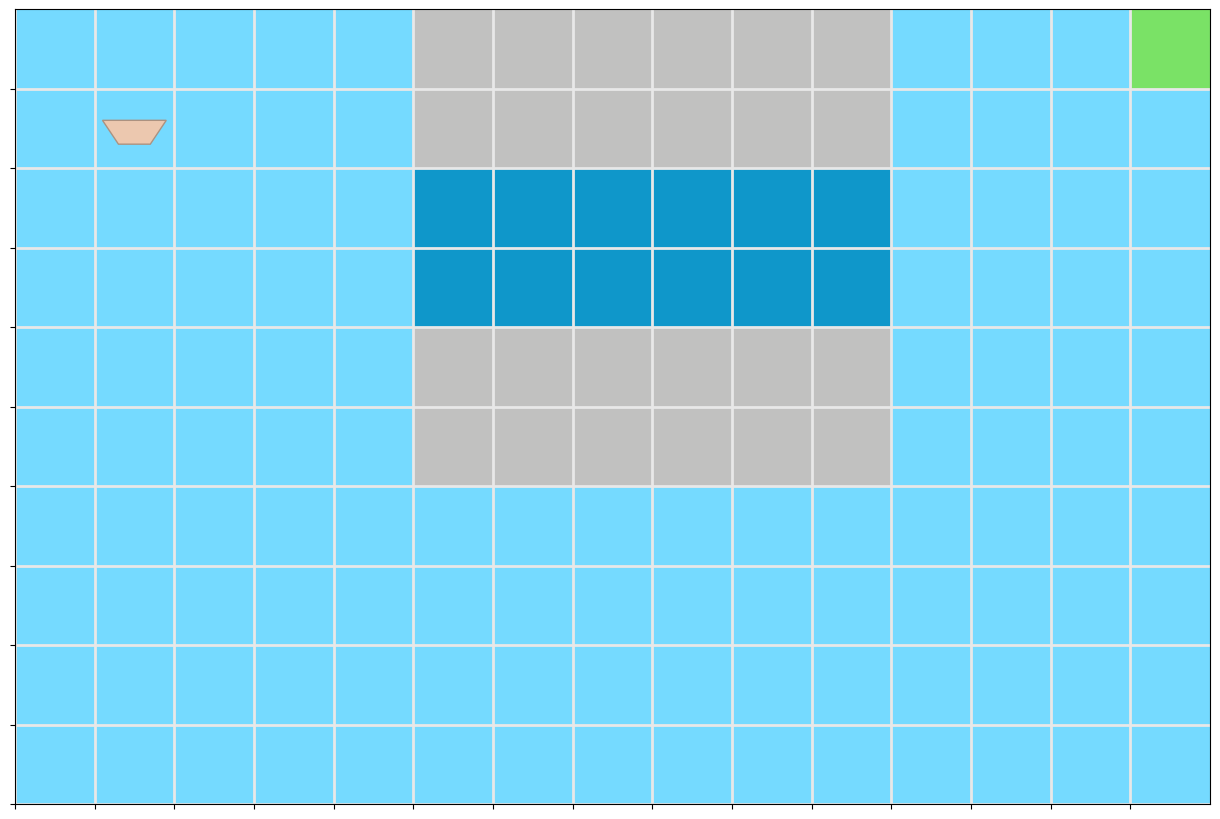

In [2]:
gamma = 0.9
eps = 1e-4 # TODO: use this value for Task 2 and Task 3
value_update_iter = 100 # TODO: change this in Task 2
rock_penalty = -2 # TODO: change this in Q1.3

# Set up the environment
env = SailingGridworld(rock_penalty=rock_penalty, value_update_iter=value_update_iter)

# Template function

In [3]:

# def get_values_policy(iterations):
#     v_est = np.zeros((env.w, env.h))
#     policy = np.zeros((env.w, env.h))
#     env.draw_values_policy(v_est, policy)

#     for i in range(iterations):
#         # TODO: Task 1, implement the value iteration and policy
#         # TODO: Task 2, convergency of the value function and policy

#         ########## Your code starts here ##########
        
#         # Estimate new state values and calculate policy
        
#         # Call env.draw_values_policy function after each iteration with your estimated state values and policy
#         # to produce a GIF of the changing values (will be automatically created and saved)
        
#         ########## Your code ends here ##########

#     return v_est, policy


In [6]:
# Own solution 

def get_values_policy(iterations):
    v_est = np.zeros((env.w, env.h))
    policy = np.zeros((env.w, env.h))
    # env.draw_values_policy(v_est, policy)

    value_converge_index = -1
    policy_converge_index = -1
    check_value_converge = False
    check_policy_converge = False

    for i in range(1, iterations + 1):
        # TODO: Task 1, implement the value iteration and policy
        # TODO: Task 2, convergency of the value function and policy
        old_v_est = v_est.copy()
        new_v_est = v_est.copy()
        old_policy = policy.copy()
        new_policy = np.zeros((env.w, env.h))

        # Iterate over all state coordinates
        for x in range(env.w):
            for y in range(env.h):
                Q_values = np.zeros(env.n_actions)
                # Iterate over all actions and calculate the Q value for each action
                for action in range(env.n_actions):
                    transitions = env.transitions[x, y, action]
                    Q_value = 0
                    for next_state, reward, done, probability in transitions:
                        if not done: 
                            next_state_value = v_est[next_state]
                        else:
                            next_state_value = 0 # Terminal state value should be zero
                        Q_value += probability * (reward + gamma * next_state_value)
                    Q_values[action] = Q_value
                new_v_est[x, y] = np.max(Q_values) # Updating state value with maximum Q value
                new_policy[x, y] = np.argmax(Q_values) # Updating state policy with action that maximizes Q values
        
        # Calculate the change in the value function among all states
        deltas = np.abs(new_v_est - old_v_est)

        # Check if the value function has converged
        if np.all(deltas < eps):
            if not check_value_converge:
                value_converge_index = i 
                check_value_converge = True               
            
            # The draw_values_policy function is slow and called only once
            # env.draw_values_policy(new_v_est, new_policy)

        # Check if the policy function has converged
        if np.array_equal(old_policy, new_policy):
            if not check_policy_converge:
                policy_converge_index = i
                check_policy_converge = True
        
        #print(f"Iteration {i+1} finishes")
        
        # Updating the value function and policy
        v_est = new_v_est
        policy = new_policy
        #print(f"Iteration {i} finishes")

        # The draw_values_policy function is slow and called only once
        if i == iterations:
            env.draw_values_policy(v_est, policy)
        #print(i)
        #print(iterations)

    print(f"Value iteration has converged after {value_converge_index} iterations")
    print(f"Policy function has converged after {policy_converge_index} iterations")

    return v_est, policy

value_est, policy = get_values_policy(iterations=value_update_iter)

Value iteration has converged after 39 iterations
Policy function has converged after 26 iterations


In [ ]:
# Model solution 

def get_q(state, action, v_est):
    tr = env.transitions[state[0], state[1], action]
    q_value = 0
    for next_state, r, done, prob in tr:
        next_state_value = v_est[next_state] if next_state is not None else 0
        q_value += prob * (r + gamma * next_state_value)
    return q_value

def get_q_values(state, v_est):
    q_values = np.zeros(env.n_actions)
    for action in range(env.n_actions):
        q_values[action] = get_q(state, action, v_est)
    return q_values

def update_value_estimates(v_est):
    new_v_est = v_est.copy()
    policy = np.zeros(v_est.shape)
    for x, y in product(range(env.w), range(env.h)):
        q_values = get_q_values((x, y), v_est)
        new_v_est[x, y] = np.max(q_values)
        policy[x, y] = np.argmax(q_values)
    return new_v_est, policy

def get_values_policy(iterations):
    v_est = np.zeros((env.w, env.h))
    policy = np.zeros((env.w, env.h))
    env.draw_values_policy(v_est, policy)

    for i in range(iterations):
        # TODO: Task 1, implement the value iteration and policy
        # TODO: Task 2, convergency of the value function and policy

        ########## Your code starts here ##########
        
        # Estimate new state values and calculate policy
        
        # Call env.draw_values_policy function after each iteration with your estimated state values and policy
        # to produce a GIF of the changing values (will be automatically created and saved)
        
        ########## Your code ends here ##########

        # Initialize a new value function and policy to store the updated values
        new_v_est, policy_new = update_value_estimates(v_est)
        env.draw_values_policy(new_v_est, policy_new)

        # Check max difference in successive value function estimates
        max_diff = np.max(np.abs(new_v_est - v_est))

        # Check if the value function has converged
        if max_diff < eps:
            print(f"Converged after {i+1} iterations with eps {eps}")
        v_est = new_v_est

        # Check if policy has changed
        if np.array_equal(policy, policy_new):
            print(f"Policy has not changed after {i+1} iterations")
        print(f"Iteration {i+1} finishes")
        policy = policy_new
    return v_est, policy

value_est, policy = get_values_policy(iterations=value_update_iter)

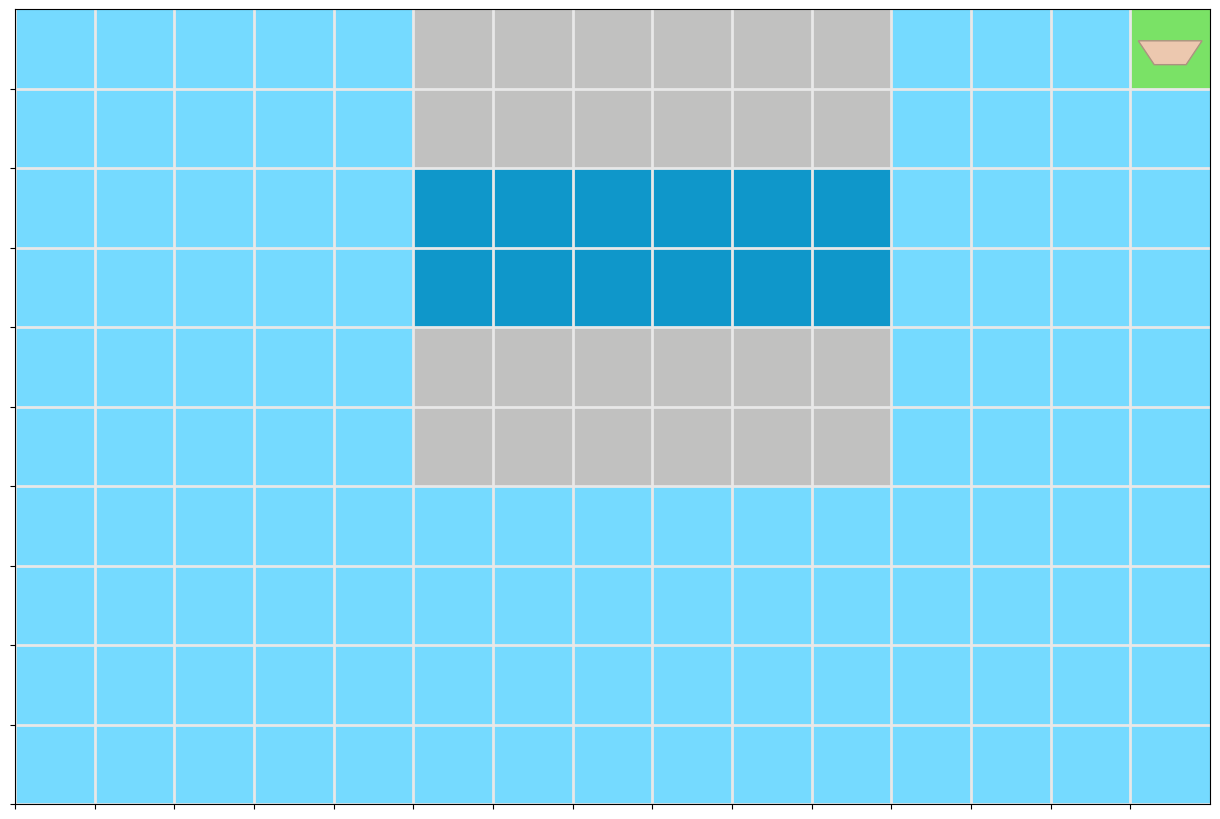

In [4]:
# Eval policy
N = 5 # TODO: change for task 4
accumulated_rewards = np.zeros(N)
for ep in range(N):
    state = env.reset()
    done = False
    t = 0
    while not done:

        ########## You code starts here ##########

        # TODO: Use the policy to take the optimal action (Task 1)
        action = policy[state]

        # Take a step in the environment
        state, reward, done, _ = env.step(action)
        
        # TODO: Calculate discounted return for the initial state
        
        accumulated_rewards[ep] = accumulated_rewards[ep] + gamma**t * reward
        t += 1
        ########## You code ends here ##########
        
        # Comment out the line below to disable rendering and make computations faster
        env.render()


In [5]:
# save value and policy
h.save_object({'value': value_est, 'policy': policy}, './value_policy.pkl')

### Question 1.3

Value iteration has converged after 43 iterations
Policy function has converged after 30 iterations


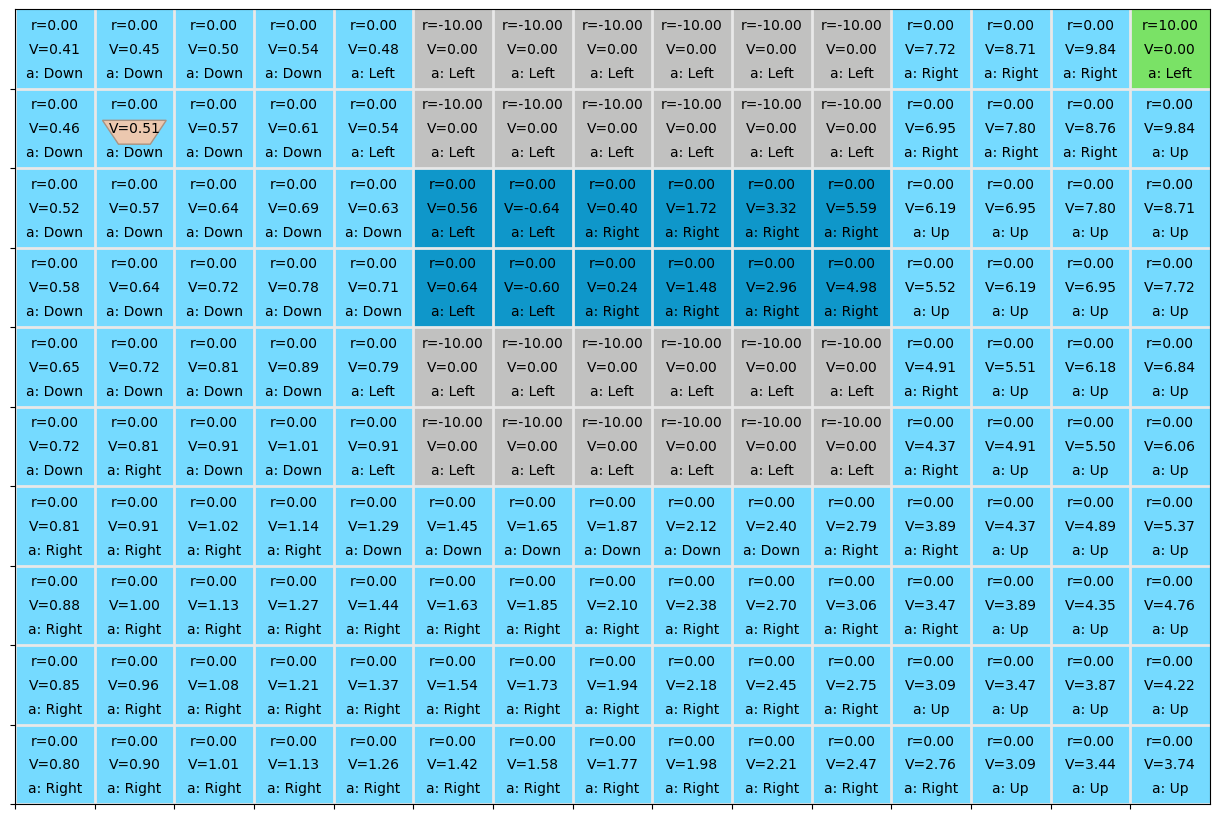

In [11]:
gamma = 0.9
eps = 1e-4 # TODO: use this value for Task 2 and Task 3
value_update_iter = 100 # TODO: change this in Task 2
rock_penalty = -10 # TODO: change this in Q1.3

# Set up the environment
env = SailingGridworld(rock_penalty=rock_penalty, value_update_iter=value_update_iter)

value_est_Q13, policy_Q13 = get_values_policy(iterations=value_update_iter)

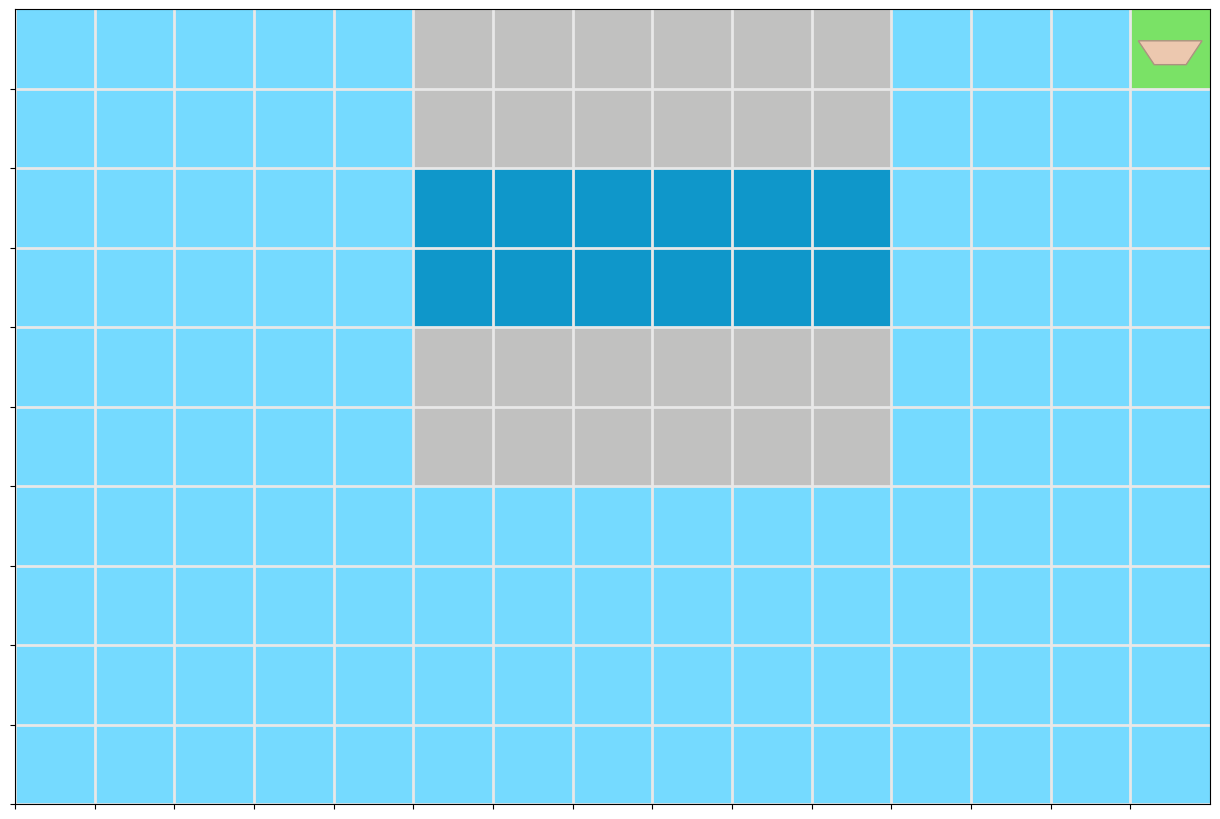

In [31]:
# Q1.3

# Eval policy
N = 2 
accumulated_rewards = np.zeros(N)
for ep in range(N):
    state = env.reset()
    done = False
    t = 0
    while not done:

        ########## You code starts here ##########

        # TODO: Use the policy to take the optimal action (Task 1)
        action = policy_Q13[state]

        # Take a step in the environment
        state, reward, done, _ = env.step(action)
        
        # TODO: Calculate discounted return for the initial state
        
        accumulated_rewards[ep] = accumulated_rewards[ep] + gamma**t * reward
        t += 1
        ########## You code ends here ##########
        
        # Comment out the line below to disable rendering and make computations faster
        env.render()

### Task 2

Value iteration has converged after -1 iterations
Policy function has converged after 26 iterations


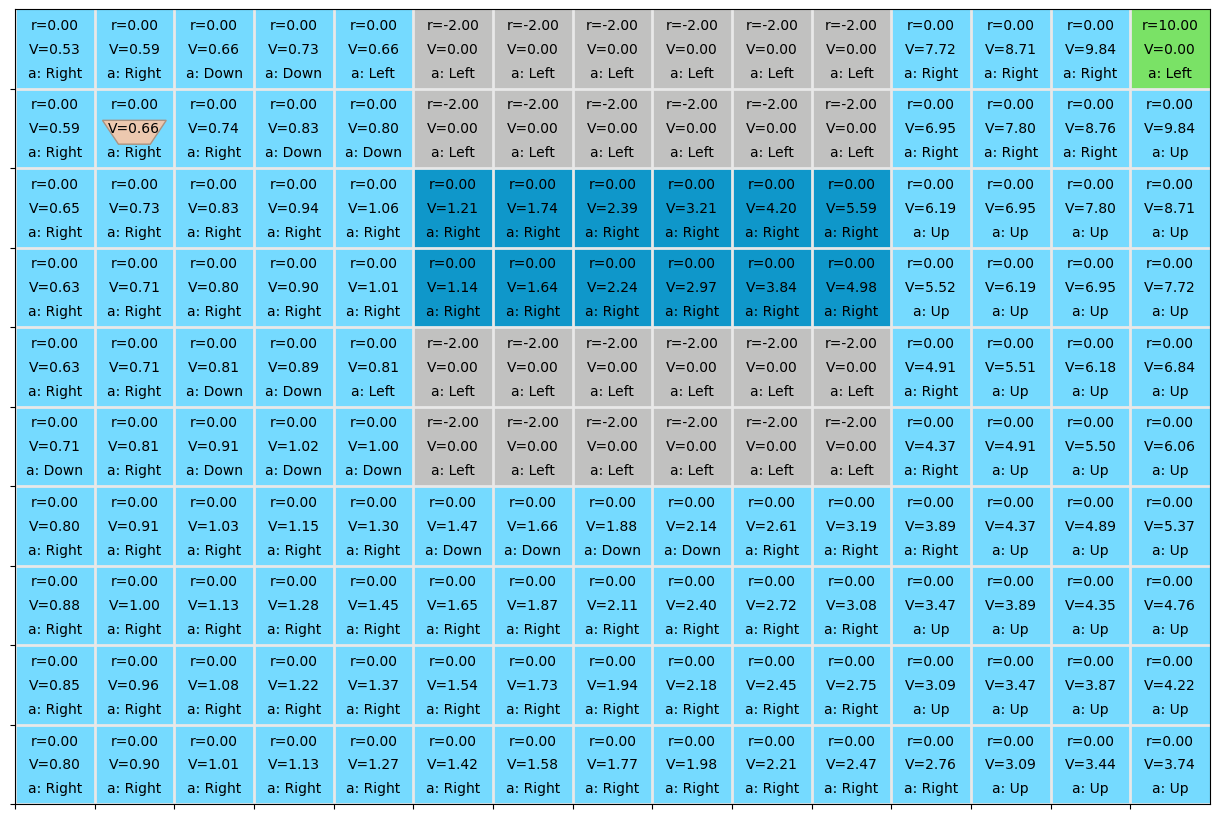

In [12]:
gamma = 0.9
eps = 1e-4 # TODO: use this value for Task 2 and Task 3
value_update_iter = 30 # TODO: change this in Task 2
rock_penalty = -2 # TODO: change this in Q1.3

# Set up the environment
env = SailingGridworld(rock_penalty=rock_penalty, value_update_iter=value_update_iter)

value_est_Task2, policy_Task2 = get_values_policy(iterations=value_update_iter)

### Task 4

Mean discounted return: 0.643768080930108
Std discounted return: 1.3685089053351995


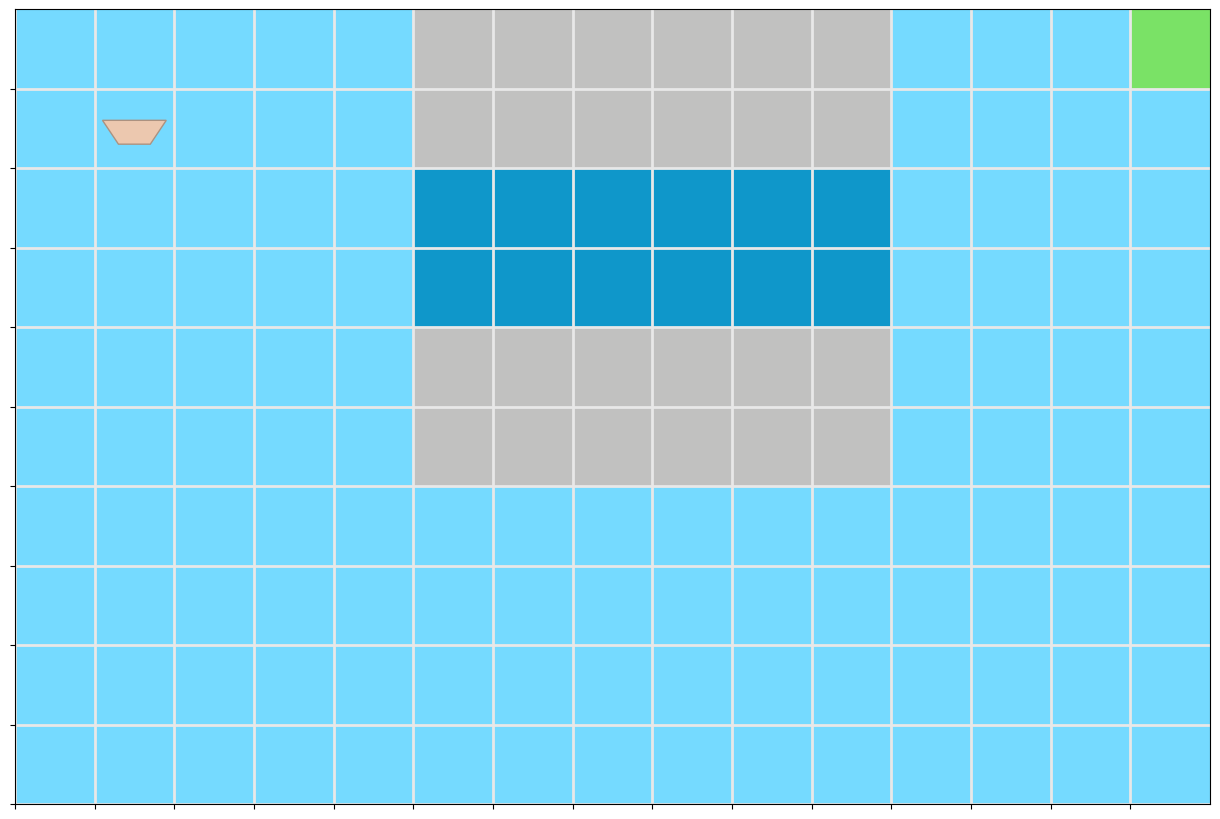

In [13]:
# Q1.3

# Eval policy
N = 1000
accumulated_rewards = np.zeros(N)
for ep in range(N):
    state = env.reset()
    done = False
    t = 0
    while not done:

        ########## You code starts here ##########

        # TODO: Use the policy to take the optimal action (Task 1)
        action = policy[state]

        # Take a step in the environment
        state, reward, done, _ = env.step(action)
        
        # TODO: Calculate discounted return for the initial state
        
        accumulated_rewards[ep] = accumulated_rewards[ep] + gamma**t * reward
        t += 1
        ########## You code ends here ##########
        
        # Comment out the line below to disable rendering and make computations faster
        # env.render()

mean_discounted_return = np.mean(accumulated_rewards)
print(f"Mean discounted return: {mean_discounted_return}")
std_discounted_return = np.std(accumulated_rewards)
print(f"Std discounted return: {std_discounted_return}")